# Exercise 4.10 PART 1: Coding Etiquette and Excel Reporting

## Contents:

    0. Import Libraries

    1. Loading and Checking the Data

    2. Address PII Data

    3. Create a Regional Segmentation of the Data

    4. Create an Exclusion Flag for Low-Activity Customers

    5. Create a Profiling Variable for Customers

    6. Create a Visualization of the Profiles

    7. Create Aggregates on a Customer-Profile Level

    8. Compare Customer Profiles

    9. Create Charts to Illustrate the Results

    10. Export the Final Dataset

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Loading and Checking the Data

In [2]:
# Define the path to the data files
path = '/Users/aaronkibler/CF Project 4 - Instacart Basket Analysis'

In [3]:
# Load "ords_prods_cust_merge.pkl" from exercise 4.9 as "df_four_ten"
df_four_ten = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
# Checking "ords_prods_cust_merge.pkl" data is correctly loaded
print(df_four_ten.head())
print(df_four_ten.info())
df_four_ten.shape

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2        907        Premium Sliced Bacon      106            12    20.0   
3        907        Premium Sliced Bacon      106            12    20.0   
4       1000                    Apricots       18            10    12.9   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2  3160996     138             1                   5                 13  ...   
3  2254091     138            10                   5                 14  ...   
4   505689     138             9                   6                 12  ...   

   first_name  surname  gender      state age date_joined dependants

(32404859, 34)

## 2. Address PII Data

### Consider any security implications that might exist for this new data. Address any PII data in the data before continuing the analysis.

In [5]:
# Remove columns that contain personally identifiable information
df_four_ten.drop(columns=['first_name', 'surname'], inplace=True)

In [6]:
# Verify the results of the changes
print(df_four_ten.head())

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2        907        Premium Sliced Bacon      106            12    20.0   
3        907        Premium Sliced Bacon      106            12    20.0   
4       1000                    Apricots       18            10    12.9   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2  3160996     138             1                   5                 13  ...   
3  2254091     138            10                   5                 14  ...   
4   505689     138             9                   6                 12  ...   

   order_frequency     frequency_flag  gender      state age date_jo

## 3. Create a Regional Segmentation of the Data

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

    1. Use the region information from Wikipedia to create the column (only create regions, not divisions).

    2. Determine whether there’s a difference in spending habits between the different U.S. regions.
    (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Creating a region column and grouping states into Region 1 (Northeast)
df_four_ten.loc[df_four_ten['state'].isin([
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island',
    'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [8]:
# Creating a region column and grouping states into Region 2 (Midwest)
df_four_ten.loc[df_four_ten['state'].isin([
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
    'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [9]:
# Creating a region column and grouping states into Region 3 (South)
df_four_ten.loc[df_four_ten['state'].isin([
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
    'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
    'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [10]:
# Creating a region column and grouping states into Region 4 (West)
df_four_ten.loc[df_four_ten['state'].isin([
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
    'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
    'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [11]:
# Checking the results using the "value_counts" function
df_four_ten['Region'].value_counts(dropna= False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
# Count of spending flags within each region
region_spending = df_four_ten.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)
region_spending

spending_flag,High_spender,Low_spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


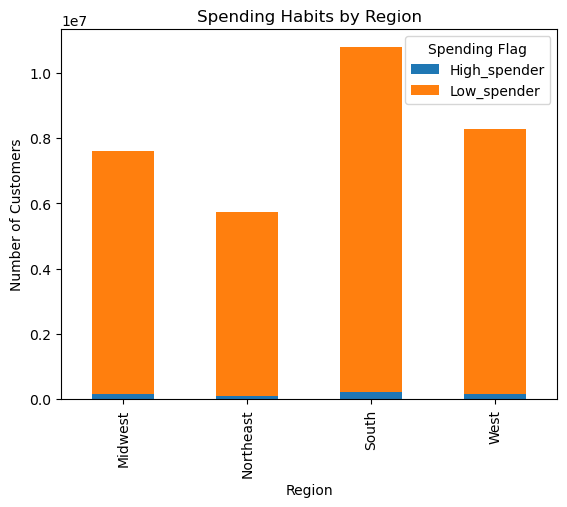

In [13]:
# Plotting the data with a stacked bar chart
bar_spending_by_region = region_spending.plot(kind='bar', stacked=True)
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.show()

## 4. Create an Exclusion Flag for Low-Activity Customers

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# Create an Exclusion Flag for Low-Activity Customers
df_four_ten['exclusion_flag'] = np.where(df_four_ten['max_order'] < 5, 'Excluded', 'Included')

In [15]:
# Checking the results using the "value_counts" function
df_four_ten['exclusion_flag'].value_counts()

exclusion_flag
Included    30964564
Excluded     1440295
Name: count, dtype: int64

In [16]:
# Separate the subsets
excluded_customers = df_four_ten[df_four_ten['exclusion_flag'] == 'Excluded']
included_customers = df_four_ten[df_four_ten['exclusion_flag'] == 'Included']

In [17]:
# Export the excluded customers subset
excluded_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

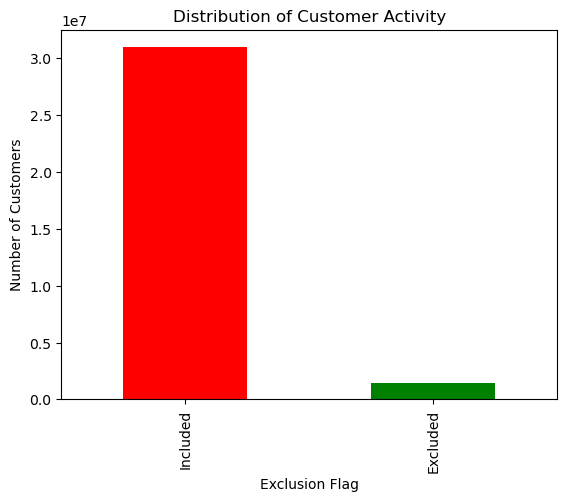

In [18]:
# Visualization of excluded vs included customers
exclusion_counts = df_four_ten['exclusion_flag'].value_counts()
bar_exclusion = exclusion_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Customer Activity')
plt.xlabel('Exclusion Flag')
plt.ylabel('Number of Customers')
plt.show()

In [19]:
# Filter the dataframe to exclude Low-Activity customers
df_four_ten = df_four_ten[df_four_ten['exclusion_flag'] == 'Included']

In [20]:
# Check the results of the filtering
print(df_four_ten.head())
print(df_four_ten.info())
df_four_ten.shape

  product_id                product_name aisle_id department_id  prices  \
0          1  Chocolate Sandwich Cookies       61            19     5.8   
1          1  Chocolate Sandwich Cookies       61            19     5.8   
2        907        Premium Sliced Bacon      106            12    20.0   
3        907        Premium Sliced Bacon      106            12    20.0   
4       1000                    Apricots       18            10    12.9   

  order_id user_id  order_number  orders_day_of_week  order_hour_of_day  ...  \
0  3139998     138            28                   6                 11  ...   
1  1977647     138            30                   6                 17  ...   
2  3160996     138             1                   5                 13  ...   
3  2254091     138            10                   5                 14  ...   
4   505689     138             9                   6                 12  ...   

   gender      state  age  date_joined dependants family_status inco

(30964564, 34)

## 5. Create a Profiling Variable for Customers

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are curious about customer profiling in their database.

    1. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of
    dependents.

    2. Also use the “orders_day_of_week” and “order_hour_of_day” columns if they impact customer profiles.
    (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or
    “Young parent.”)

In [21]:
# Creating Age Profiles
df_four_ten.loc[df_four_ten['age'] < 30, 'age_profile'] = 'Young Adult'
df_four_ten.loc[(df_four_ten['age'] >= 30) & (df_four_ten['age'] < 60), 'age_profile'] = 'Middle Aged'
df_four_ten.loc[df_four_ten['age'] >= 60, 'age_profile'] = 'Senior'

In [22]:
# Checking the results using the "value_counts" function
df_four_ten['age_profile'].value_counts()

age_profile
Middle Aged    14572457
Senior         10574504
Young Adult     5817603
Name: count, dtype: int64

In [23]:
# Creating Income Profiles
df_four_ten.loc[df_four_ten['income'] < 50000, 'income_profile'] = 'Low Income'
df_four_ten.loc[(df_four_ten['income'] >= 50000) & (df_four_ten['income'] < 100000), 'income_profile'] = 'Middle Income'
df_four_ten.loc[df_four_ten['income'] >= 100000, 'income_profile'] = 'High Income'

In [24]:
# Checking the results using the "value_counts" function
df_four_ten['income_profile'].value_counts()

income_profile
High Income      14207402
Middle Income    13394608
Low Income        3362554
Name: count, dtype: int64

In [25]:
# Creating Dependents Profiles
df_four_ten.loc[df_four_ten['dependants'] == 0, 'dependents_profile'] = 'Single'
df_four_ten.loc[(df_four_ten['dependants'] > 0) & (df_four_ten['dependants'] <= 2), 'dependents_profile'] = 'Small Family'
df_four_ten.loc[df_four_ten['dependants'] > 2, 'dependents_profile'] = 'Large Family'

In [26]:
# Checking the results using the "value_counts" function
df_four_ten['dependents_profile'].value_counts()

dependents_profile
Small Family    15452367
Large Family     7772516
Single           7739681
Name: count, dtype: int64

In [27]:
# Creating Department-Based Profiles for selected departments
df_four_ten.loc[df_four_ten['department_id'] == '8', 'department_profile'] = 'Pet Owner'
df_four_ten.loc[df_four_ten['department_id'] == '18', 'department_profile'] = 'Baby Product Shopper'
df_four_ten.loc[df_four_ten['department_id'] == '5', 'department_profile'] = 'Alcohol Consumer'
df_four_ten.loc[df_four_ten['department_id'] == '4', 'department_profile'] = 'Fresh Produce Buyer'
df_four_ten.loc[df_four_ten['department_id'] == '16', 'department_profile'] = 'Dairy & Eggs Buyer'
df_four_ten.loc[df_four_ten['department_id'] == '19', 'department_profile'] = 'Snack Purchaser'
df_four_ten.loc[df_four_ten['department_id'] == '12', 'department_profile'] = 'Meat & Seafood Consumer'
df_four_ten.loc[df_four_ten['department_id'] == '15', 'department_profile'] = 'Canned Goods Purchaser'
df_four_ten.loc[df_four_ten['department_id'] == '1', 'department_profile'] = 'Frozen Food Buyer'
df_four_ten.loc[df_four_ten['department_id'] == '3', 'department_profile'] = 'Bakery Item Purchaser'
df_four_ten.loc[df_four_ten['department_id'] == '20', 'department_profile'] = 'Deli Consumer'

# For customers who do not fall into the above categories
df_four_ten.loc[~df_four_ten['department_id'].isin(['8', '18', '5', '4', '16', '19', '12', '15', '1', '3', '20']), 'department_profile'] = 'Other Shoppers'

In [28]:
# Checking the results using the "value_counts" function
df_four_ten['department_profile'].value_counts()

department_profile
Fresh Produce Buyer        9079273
Other Shoppers             7360376
Dairy & Eggs Buyer         5177182
Snack Purchaser            2766406
Frozen Food Buyer          2121731
Bakery Item Purchaser      1120828
Canned Goods Purchaser     1012074
Deli Consumer              1003834
Meat & Seafood Consumer     674781
Baby Product Shopper        410392
Alcohol Consumer            144627
Pet Owner                    93060
Name: count, dtype: int64

In [29]:
# Creating order timing profiles based on "order_hour_of_day"
df_four_ten.loc[df_four_ten['order_hour_of_day'] < 12, 'timing_profile'] = 'Morning Buyer'
df_four_ten.loc[(df_four_ten['order_hour_of_day'] >= 12) & (df_four_ten['order_hour_of_day'] < 18), 'timing_profile'] = 'Afternoon Buyer'
df_four_ten.loc[df_four_ten['order_hour_of_day'] >= 18, 'timing_profile'] = 'Evening Buyer'

In [30]:
# Checking the results using the "value_counts" function
df_four_ten['timing_profile'].value_counts()

timing_profile
Afternoon Buyer    14534966
Morning Buyer      10998902
Evening Buyer       5430696
Name: count, dtype: int64

In [31]:
# Creating order day of the week profiles
df_four_ten.loc[df_four_ten['orders_day_of_week'].isin([0, 6]), 'day_of_week_profile'] = 'Weekend Shopper'  # Sunday (0) and Saturday (6)
df_four_ten.loc[df_four_ten['orders_day_of_week'].isin([1, 2, 3, 4, 5]), 'day_of_week_profile'] = 'Weekday Shopper'  # Monday to Friday

In [32]:
# Checking the results using the "value_counts" function
df_four_ten['day_of_week_profile'].value_counts()

day_of_week_profile
Weekday Shopper    20764650
Weekend Shopper    10199914
Name: count, dtype: int64

In [33]:
# Viewing the DataFrame to confirm profile columns are added
print(df_four_ten[['age_profile', 'income_profile', 'dependents_profile', 'department_profile', 'timing_profile', 'day_of_week_profile']].head())

  age_profile income_profile dependents_profile       department_profile  \
0      Senior     Low Income       Small Family          Snack Purchaser   
1      Senior     Low Income       Small Family          Snack Purchaser   
2      Senior     Low Income       Small Family  Meat & Seafood Consumer   
3      Senior     Low Income       Small Family  Meat & Seafood Consumer   
4      Senior     Low Income       Small Family           Other Shoppers   

    timing_profile day_of_week_profile  
0    Morning Buyer     Weekend Shopper  
1  Afternoon Buyer     Weekend Shopper  
2  Afternoon Buyer     Weekday Shopper  
3  Afternoon Buyer     Weekday Shopper  
4  Afternoon Buyer     Weekend Shopper  


## 6. Create a Visualization of the Profiles

### Create an appropriate visualization to show the distribution of profiles.

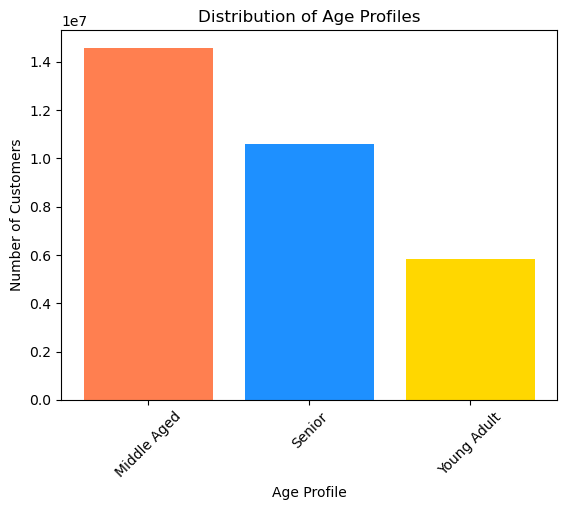

In [34]:
# Age Profile Visualization
age_profile_counts = df_four_ten['age_profile'].value_counts()
age_profile_counts = age_profile_counts.sort_index()
plt.bar(age_profile_counts.index, age_profile_counts.values, color=['coral', 'dodgerblue', 'gold'])
plt.title('Distribution of Age Profiles')
plt.xlabel('Age Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
age_profile_bar = plt.gcf()
plt.show()

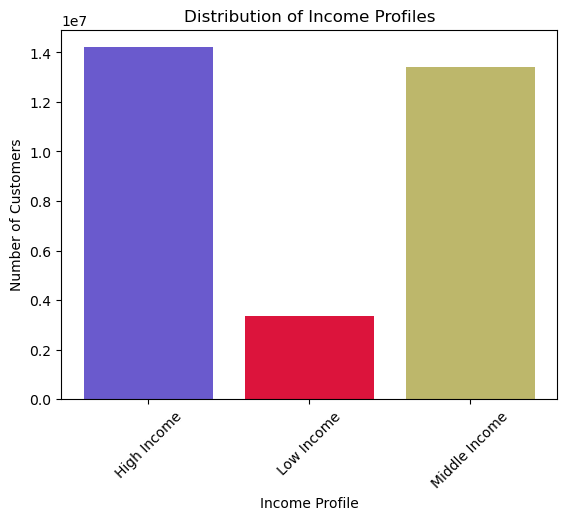

In [35]:
# Income Profile Visualization
income_profile_counts = df_four_ten['income_profile'].value_counts()
income_profile_counts = income_profile_counts.sort_index()
plt.bar(income_profile_counts.index, income_profile_counts.values, color=['slateblue', 'crimson', 'darkkhaki'])
plt.title('Distribution of Income Profiles')
plt.xlabel('Income Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
income_profile_bar = plt.gcf()
plt.show()

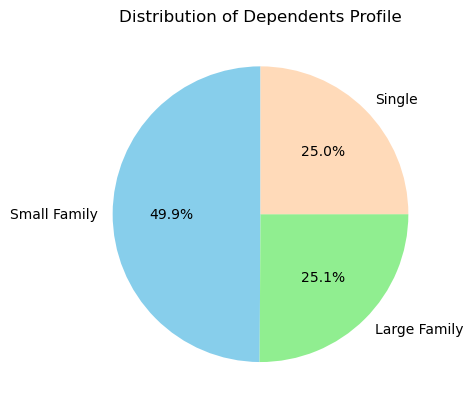

In [36]:
# Number of Dependents Profile Visualization
dependents_counts = df_four_ten['dependents_profile'].value_counts()
dependents_profile_pie = dependents_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'peachpuff'])
plt.title('Distribution of Dependents Profile')
plt.ylabel('')
plt.show()

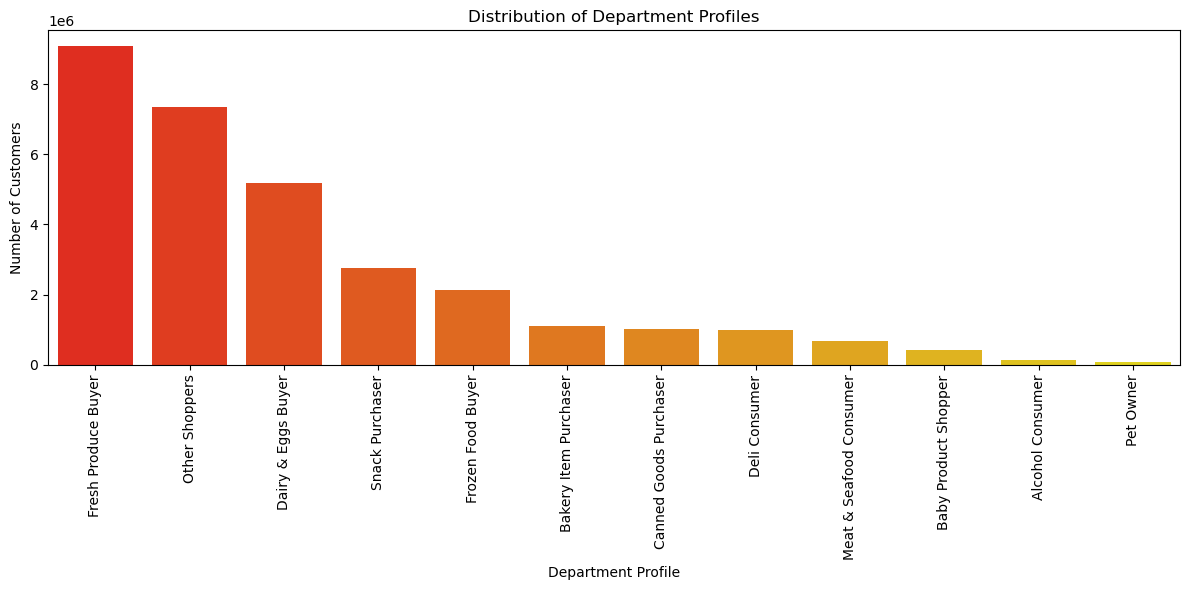

In [37]:
# Department-Based Profile Visualization
order = df_four_ten['department_profile'].value_counts().index
department_profile_bar = plt.figure(figsize=(12, 6))
sns.countplot(data=df_four_ten, x='department_profile', palette='autumn', order=order)
plt.title('Distribution of Department Profiles')
plt.xlabel('Department Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

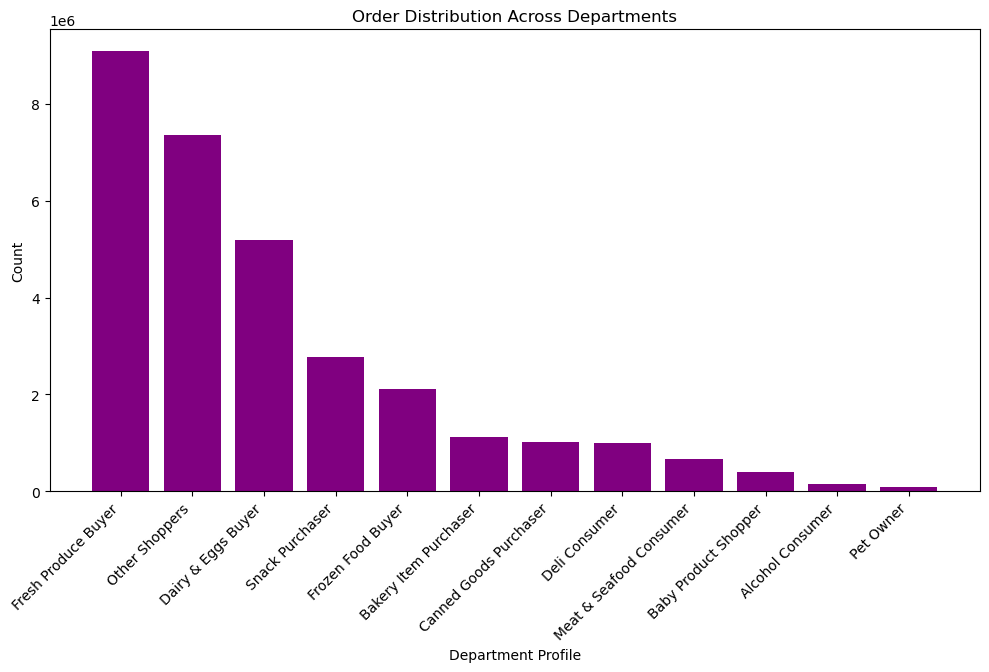

In [38]:
# Histogram of number of orders across departments
department_counts = df_four_ten['department_profile'].value_counts()
department_counts_sorted = department_counts.sort_values(ascending=False)
departments_profile_histo = plt.figure(figsize=(12, 6))
plt.bar(department_counts_sorted.index, department_counts_sorted.values, color='purple')
plt.title('Order Distribution Across Departments')
plt.xlabel('Department Profile')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

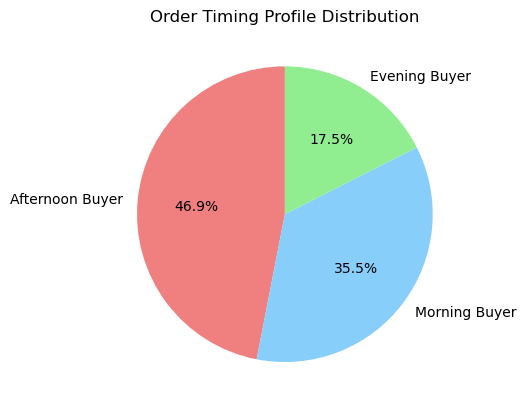

In [39]:
# Order Timing Profile Visualization
timing_counts = df_four_ten['timing_profile'].value_counts()
timing_profile_pie = timing_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Order Timing Profile Distribution')
plt.ylabel('')
plt.show()

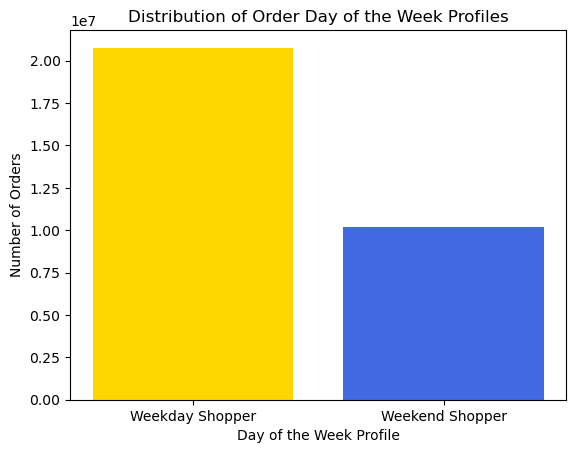

In [40]:
# Order Day of the Week Profile Visualization
day_of_week_counts = df_four_ten['day_of_week_profile'].value_counts().sort_index()
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color=['gold', 'royalblue'])
plt.title('Distribution of Order Day of the Week Profiles')
plt.xlabel('Day of the Week Profile')
plt.ylabel('Number of Orders')
day_of_week_profile_bar = plt.gcf()
plt.show()

## 7. Create Aggregates on a Customer-Profile Level

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
# Aggregation for Age Profile
age_profile_agg = df_four_ten.groupby('age_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
age_profile_agg

order_number                prices               
                     max       mean min    max      mean  min
age_profile                                                  
Middle Aged           99  17.865629   1   25.0  7.790417  1.0
Senior                99  17.807616   1   25.0  7.795446  1.0
Young Adult           99  17.803483   1   25.0  7.782198  1.0

In [42]:
# Aggregation for Income Profile
income_profile_agg = df_four_ten.groupby('income_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
income_profile_agg

order_number                prices               
                        max       mean min    max      mean  min
income_profile                                                  
High Income              99  17.918880   1   25.0  7.953438  1.0
Low Income               99  16.835516   1   25.0  6.707347  1.0
Middle Income            99  17.994953   1   25.0  7.889854  1.0

In [43]:
# Aggregation for Number of Dependents Profile
dependents_profile_agg = df_four_ten.groupby('dependents_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
dependents_profile_agg

order_number                prices               
                            max       mean min    max      mean  min
dependents_profile                                                  
Large Family                 99  17.837412   1   25.0  7.792886  1.0
Single                       99  17.957922   1   25.0  7.789550  1.0
Small Family                 99  17.770497   1   25.0  7.789957  1.0

In [44]:
# Aggregation for Department-Based Profile
department_profile_agg = df_four_ten.groupby('department_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
department_profile_agg

order_number                prices                
                                 max       mean min    max       mean  min
department_profile                                                        
Alcohol Consumer                  99  16.034226   1   15.0   8.150699  1.0
Baby Product Shopper              99  19.867090   1   15.0   7.634399  1.0
Bakery Item Purchaser             99  17.856619   1   15.0   7.857482  1.0
Canned Goods Purchaser            99  16.933858   1   15.0   7.546660  1.0
Dairy & Eggs Buyer                99  18.324695   1   15.0   8.336372  1.0
Deli Consumer                     99  17.144802   1   15.0   7.783347  1.0
Fresh Produce Buyer               99  18.495730   1   15.0   7.980348  1.0
Frozen Food Buyer                 99  16.160739   1   15.0   7.733725  1.0
Meat & Seafood Consumer           99  16.576910   1   25.0  16.300034  8.0
Other Shoppers                    99  17.431708   1   20.0   7.755132  1.0
Pet Owner                         99  15.995927   1   15.0   7.887489  1.0
Snack Purchaser                   99  17.830354   1    7.0   4.275555  1.6

In [45]:
# Aggregation for Order Timing Profile
timing_profile_agg = df_four_ten.groupby('timing_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
timing_profile_agg

order_number                prices               
                         max       mean min    max      mean  min
timing_profile                                                   
Afternoon Buyer           99  17.383027   1   25.0  7.799852  1.0
Evening Buyer             99  16.998653   1   25.0  7.803965  1.0
Morning Buyer             99  18.842807   1   25.0  7.771747  1.0

In [46]:
# Aggregation for Order Day of the Week Profile
day_of_week_profile_agg = df_four_ten.groupby('day_of_week_profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
day_of_week_profile_agg

order_number                prices               
                             max       mean min    max      mean  min
day_of_week_profile                                                  
Weekday Shopper               99  18.324388   1   25.0  7.757549  1.0
Weekend Shopper               99  16.836113   1   25.0  7.857852  1.0

## 8. Compare Customer Profiles

### Compare the customer profiles created with regions and departments. Can a link between them be identified? Customers may demonstrate different behaviors across regions, which could make this information important.

In [47]:
# Cross-tabulation of Regions and Customer Age Profiles
region_age_profile_ct = pd.crosstab(df_four_ten['Region'], df_four_ten['age_profile'])
region_age_profile_ct

age_profile,Middle Aged,Senior,Young Adult
Region,,,
Midwest,3450232,2455443,1355838
Northeast,2556472,1884229,1023984
South,4829067,3521421,1960651
West,3736686,2713411,1477130


In [48]:
# Cross-tabulation of Regions and Departments
region_department_ct = pd.crosstab(df_four_ten['Region'], df_four_ten['department_profile'])
region_department_ct

department_profile,Alcohol Consumer,Baby Product Shopper,Bakery Item Purchaser,Canned Goods Purchaser,Dairy & Eggs Buyer,Deli Consumer,Fresh Produce Buyer,Frozen Food Buyer,Meat & Seafood Consumer,Other Shoppers,Pet Owner,Snack Purchaser
Region,,,,,,,,,,,,
Midwest,34043,95741,261753,237459,1212490,234464,2134115,498225,158260,1728462,21358,645143
Northeast,25017,72712,199300,176936,914616,178398,1593004,370436,118571,1304807,17734,493154
South,48813,139511,371620,337458,1723016,333620,3027476,709906,224120,2448910,29909,916780
West,36754,102428,288155,260221,1327060,257352,2324678,543164,173830,1878197,24059,711329


In [49]:
# Aggregating order counts by region and department
region_department_agg = df_four_ten.groupby(['Region', 'department_profile']).agg({'order_number': 'count'}).rename(columns={'order_number': 'total_orders'})
region_department_agg

total_orders
Region    department_profile                   
Midwest   Alcohol Consumer                34043
          Baby Product Shopper            95741
          Bakery Item Purchaser          261753
          Canned Goods Purchaser         237459
          Dairy & Eggs Buyer            1212490
          Deli Consumer                  234464
          Fresh Produce Buyer           2134115
          Frozen Food Buyer              498225
          Meat & Seafood Consumer        158260
          Other Shoppers                1728462
          Pet Owner                       21358
          Snack Purchaser                645143
Northeast Alcohol Consumer                25017
          Baby Product Shopper            72712
          Bakery Item Purchaser          199300
          Canned Goods Purchaser         176936
          Dairy & Eggs Buyer             914616
          Deli Consumer                  178398
          Fresh Produce Buyer           1593004
          Frozen Food Buyer              370436
          Meat & Seafood Consumer        118571
          Other Shoppers                1304807
          Pet Owner                       17734
          Snack Purchaser                493154
South     Alcohol Consumer                48813
          Baby Product Shopper           139511
          Bakery Item Purchaser          371620
          Canned Goods Purchaser         337458
          Dairy & Eggs Buyer            1723016
          Deli Consumer                  333620
          Fresh Produce Buyer           3027476
          Frozen Food Buyer              709906
          Meat & Seafood Consumer        224120
          Other Shoppers                2448910
          Pet Owner                       29909
          Snack Purchaser                916780
West      Alcohol Consumer                36754
          Baby Product Shopper           102428
          Bakery Item Purchaser          288155
          Canned Goods Purchaser         260221
          Dairy & Eggs Buyer            1327060
          Deli Consumer                  257352
          Fresh Produce Buyer           2324678
          Frozen Food Buyer              543164
          Meat & Seafood Consumer        173830
          Other Shoppers                1878197
          Pet Owner                       24059
          Snack Purchaser                711329

In [50]:
# Aggregating prices (mean, max, min) by region and department
region_department_prices = df_four_ten.groupby(['Region', 'department_profile']).agg({'prices': ['mean', 'max', 'min']})
region_department_prices

prices           
                                        mean   max  min
Region    department_profile                           
Midwest   Alcohol Consumer          8.132306  15.0  1.0
          Baby Product Shopper      7.606518  15.0  1.0
          Bakery Item Purchaser     7.863385  15.0  1.0
          Canned Goods Purchaser    7.556046  15.0  1.0
          Dairy & Eggs Buyer        8.337914  15.0  1.0
          Deli Consumer             7.808128  15.0  1.0
          Fresh Produce Buyer       7.981814  15.0  1.0
          Frozen Food Buyer         7.720724  15.0  1.0
          Meat & Seafood Consumer  16.266496  25.0  8.0
          Other Shoppers            7.756148  20.0  1.0
          Pet Owner                 7.816219  15.0  1.0
          Snack Purchaser           4.275715   7.0  1.6
Northeast Alcohol Consumer          8.047424  15.0  1.0
          Baby Product Shopper      7.640340  15.0  1.0
          Bakery Item Purchaser     7.864929  15.0  1.0
          Canned Goods Purchaser    7.522071  15.0  1.0
          Dairy & Eggs Buyer        8.340134  15.0  1.0
          Deli Consumer             7.769181  15.0  1.0
          Fresh Produce Buyer       7.977581  15.0  1.0
          Frozen Food Buyer         7.733236  15.0  1.0
          Meat & Seafood Consumer  16.277747  25.0  8.0
          Other Shoppers            7.744347  20.0  1.0
          Pet Owner                 7.936715  15.0  1.1
          Snack Purchaser           4.269636   7.0  1.6
South     Alcohol Consumer          8.178668  15.0  1.0
          Baby Product Shopper      7.666152  15.0  1.0
          Bakery Item Purchaser     7.850614  15.0  1.0
          Canned Goods Purchaser    7.558106  15.0  1.0
          Dairy & Eggs Buyer        8.327484  15.0  1.0
          Deli Consumer             7.784080  15.0  1.0
          Fresh Produce Buyer       7.982604  15.0  1.0
          Frozen Food Buyer         7.744888  15.0  1.0
          Meat & Seafood Consumer  16.321334  25.0  8.0
          Other Shoppers            7.763511  20.0  1.0
          Pet Owner                 7.847558  15.0  1.0
          Snack Purchaser           4.274023   7.0  1.6
West      Alcohol Consumer          8.200884  15.0  1.0
          Baby Product Shopper      7.612995  15.0  1.0
          Bakery Item Purchaser     7.855828  15.0  1.0
          Canned Goods Purchaser    7.539971  15.0  1.0
          Dairy & Eggs Buyer        8.343911  15.0  1.0
          Deli Consumer             7.769638  15.0  1.0
          Fresh Produce Buyer       7.977962  15.0  1.0
          Frozen Food Buyer         7.731394  15.0  1.0
          Meat & Seafood Consumer  16.318309  25.0  8.0
          Other Shoppers            7.750763  20.0  1.0
          Pet Owner                 7.964113  15.0  1.0
          Snack Purchaser           4.281487   7.0  1.6

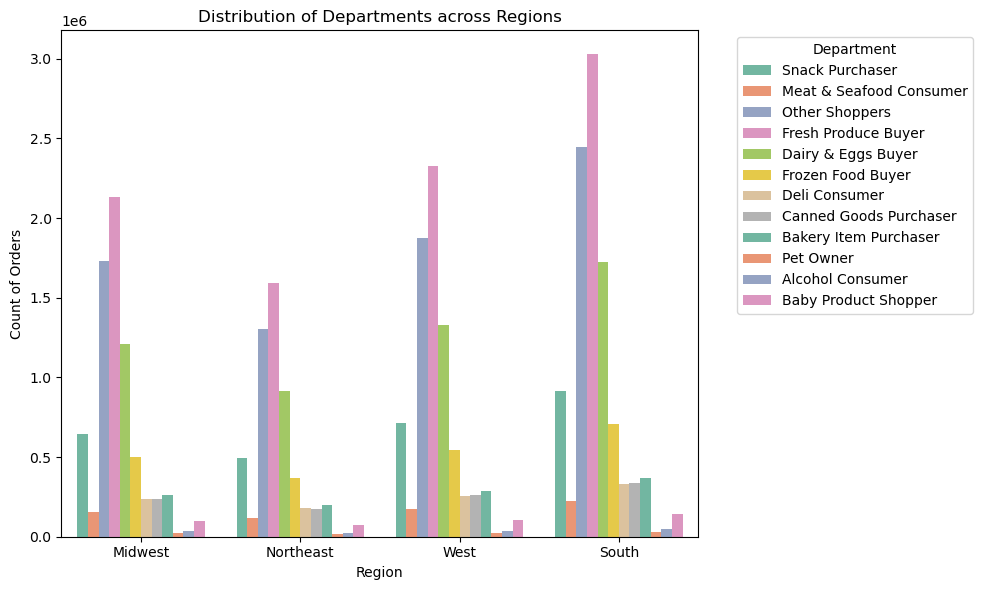

In [51]:
# Orders by departments for each region
department_regions_bar = plt.figure(figsize=(10, 6))
sns.countplot(data=df_four_ten, x='Region', hue='department_profile', palette='Set2')
plt.title('Distribution of Departments across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

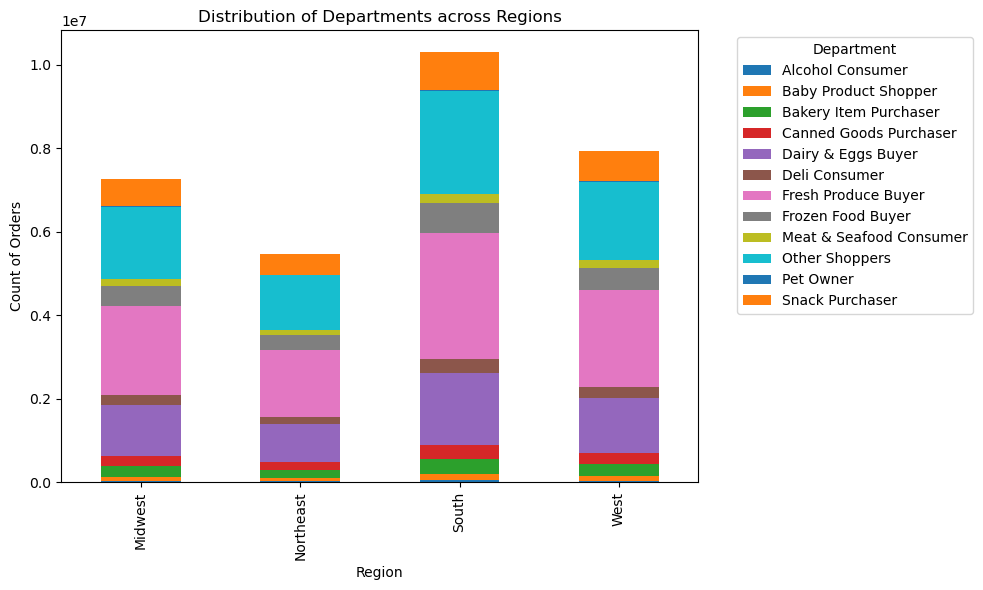

In [52]:
# Stacked bar chart of orders by departments across regions
region_department_crosstab = pd.crosstab(df_four_ten['Region'], df_four_ten['department_profile'])
region_department_stacked_bar = region_department_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Departments across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
# Checking the differences in ordering habits based on a customer’s loyalty status
df_four_ten.groupby('loyalty_flag').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
                      mean median  min   max
loyalty_flag                                
Loyal customer    7.773575    7.4  1.0  25.0
New customer      7.801665    7.4  1.0  25.0
Regular customer  7.798262    7.4  1.0  25.0

In [54]:
# Comparing the age_profile and dependents_profile with order frequency
order_freq_age_dependents_ct = pd.crosstab(index=df_four_ten['age_profile'], columns=df_four_ten['dependents_profile'], values=df_four_ten['order_frequency'], aggfunc='mean')
order_freq_age_dependents_ct

dependents_profile,Large Family,Single,Small Family
age_profile,,,
Middle Aged,9.974582,9.931305,9.982001
Senior,9.995396,9.874549,9.966840
Young Adult,9.805089,10.063159,9.951654


In [55]:
# Comparing the age_profile and dependents_profile with prices
order_freq_age_dependents_prices_ct = pd.crosstab(index=df_four_ten['age_profile'], columns=df_four_ten['dependents_profile'], values=df_four_ten['prices'], aggfunc='mean')
order_freq_age_dependents_prices_ct

dependents_profile,Large Family,Single,Small Family
age_profile,,,
Middle Aged,7.796063,7.788679,7.788456
Senior,7.788117,7.801014,7.796354
Young Adult,7.793638,7.770795,7.782123


In [56]:
# Customer profile cross-tabulation for 'order_frequency'
order_freq_ct = pd.pivot_table(df_four_ten, values='order_frequency', index=['age_profile', 'income_profile', 'dependents_profile'], aggfunc='mean')
order_freq_ct

order_frequency
age_profile income_profile dependents_profile                 
Middle Aged High Income    Large Family               9.879867
                           Single                     9.812812
                           Small Family               9.973803
            Low Income     Large Family              10.726996
                           Single                    10.498628
                           Small Family              10.575576
            Middle Income  Large Family               9.884103
                           Single                     9.913779
                           Small Family               9.843111
Senior      High Income    Large Family               9.889259
                           Single                     9.797045
                           Small Family               9.883705
            Low Income     Large Family              10.285582
                           Single                    10.448109
                           Small Family              10.479009
            Middle Income  Large Family              10.235060
                           Single                     9.912337
                           Small Family              10.036558
Young Adult High Income    Large Family              10.275412
                           Single                     9.303160
                           Small Family               9.508288
            Low Income     Large Family              10.682436
                           Single                    10.410526
                           Small Family              10.420955
            Middle Income  Large Family               9.630446
                           Single                    10.023961
                           Small Family               9.880550

In [57]:
# Customer profile cross-tabulation for 'prices'
prices_ct = pd.pivot_table(df_four_ten, values='prices', index=['age_profile', 'income_profile', 'dependents_profile'], aggfunc='mean')
prices_ct

prices
age_profile income_profile dependents_profile          
Middle Aged High Income    Large Family        7.957427
                           Single              7.948718
                           Small Family        7.956998
            Low Income     Large Family        6.737485
                           Single              6.711653
                           Small Family        6.693282
            Middle Income  Large Family        7.894131
                           Single              7.891006
                           Small Family        7.886310
Senior      High Income    Large Family        7.946033
                           Single              7.951657
                           Small Family        7.958974
            Low Income     Large Family        6.487729
                           Single              6.521297
                           Small Family        6.519808
            Middle Income  Large Family        7.778185
                           Single              7.786728
                           Small Family        7.764236
Young Adult High Income    Large Family        7.903759
                           Single              7.957131
                           Small Family        7.827010
            Low Income     Large Family        6.875589
                           Single              6.894898
                           Small Family        6.902568
            Middle Income  Large Family        7.954169
                           Single              7.942536
                           Small Family        7.945892

## 9. Create Charts to Illustrate the Results

### Produce suitable charts to illustrate the results of all steps of the task.

### Charts for the task were created within the steps above. Additional charts to help answer the "key questions" in the project brief are included below.

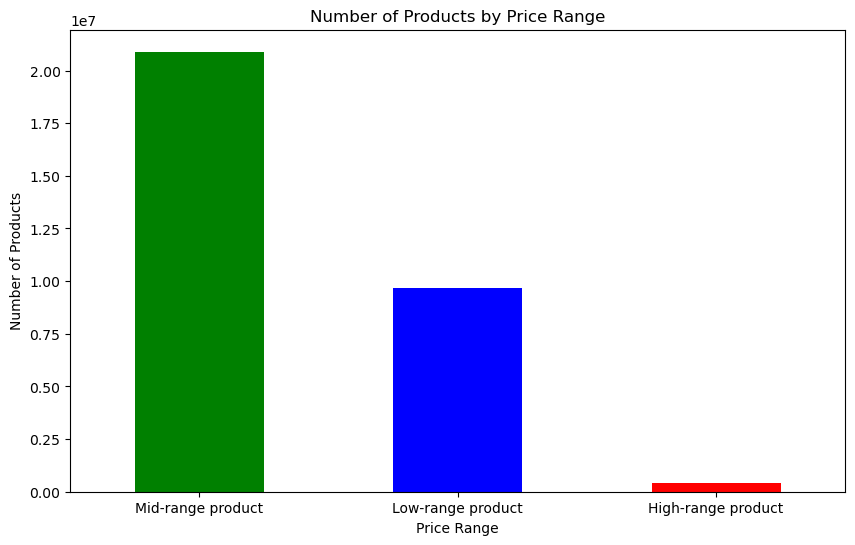

In [58]:
# Visalization of price range groupings for "key question" number 3
price_range_counts = df_four_ten['price_range_loc'].value_counts()
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Number of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
price_range_bar = plt.gcf()
plt.show()

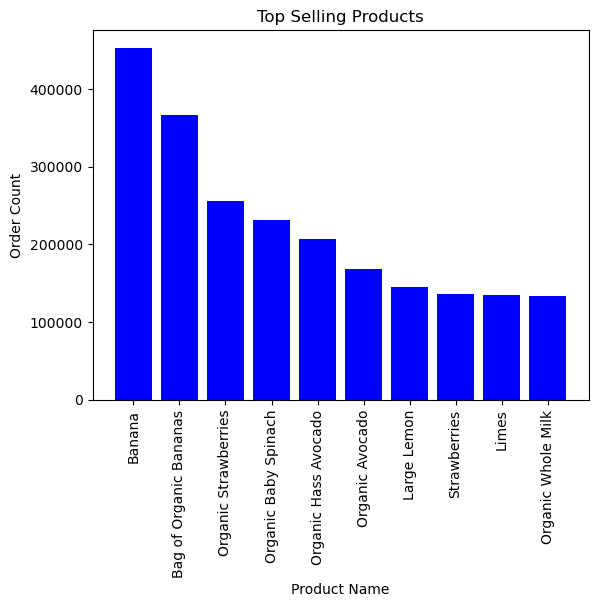

In [59]:
# Visualize the top selling products for "key question" number 4
product_order_counts = df_four_ten['product_id'].value_counts().reset_index()
product_order_counts.columns = ['product_id', 'order_count']
product_order_counts = product_order_counts.merge(df_four_ten[['product_id', 'product_name']].drop_duplicates(), on='product_id')
top_selling_products = product_order_counts.sort_values('order_count', ascending=False).head(10)
plt.bar(top_selling_products['product_name'], top_selling_products['order_count'], color='blue')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.title('Top Selling Products')
plt.xticks(rotation=90)
top_selling_products_bar = plt.gcf()
plt.show()

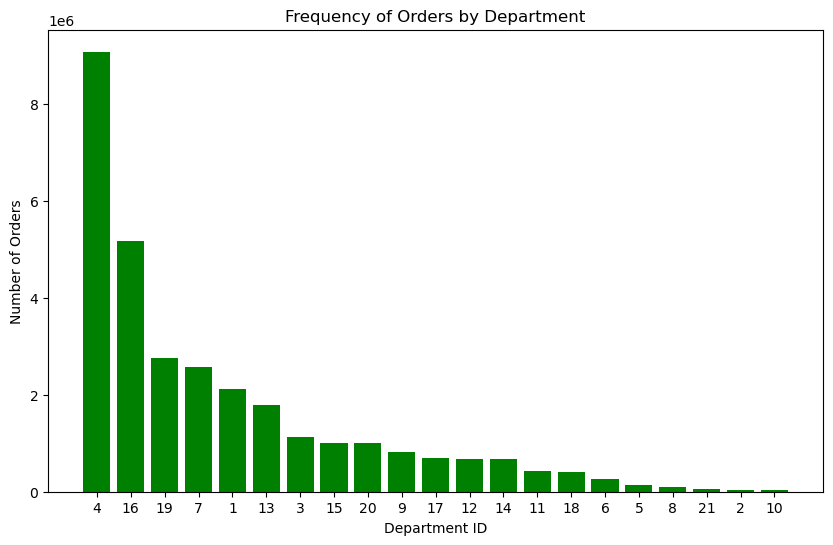

In [60]:
# Visualize the frequency of orders for departments for "key question" number 4
order_counts_per_department = df_four_ten.groupby('department_id').size()
order_counts_per_department = order_counts_per_department.reset_index(name='order_count')
order_counts_per_department = order_counts_per_department.sort_values('order_count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(order_counts_per_department['department_id'].astype(str), order_counts_per_department['order_count'], color='green')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Department')
plt.xticks(rotation=0)
departments_order_freq_bar = plt.gcf()
plt.show()

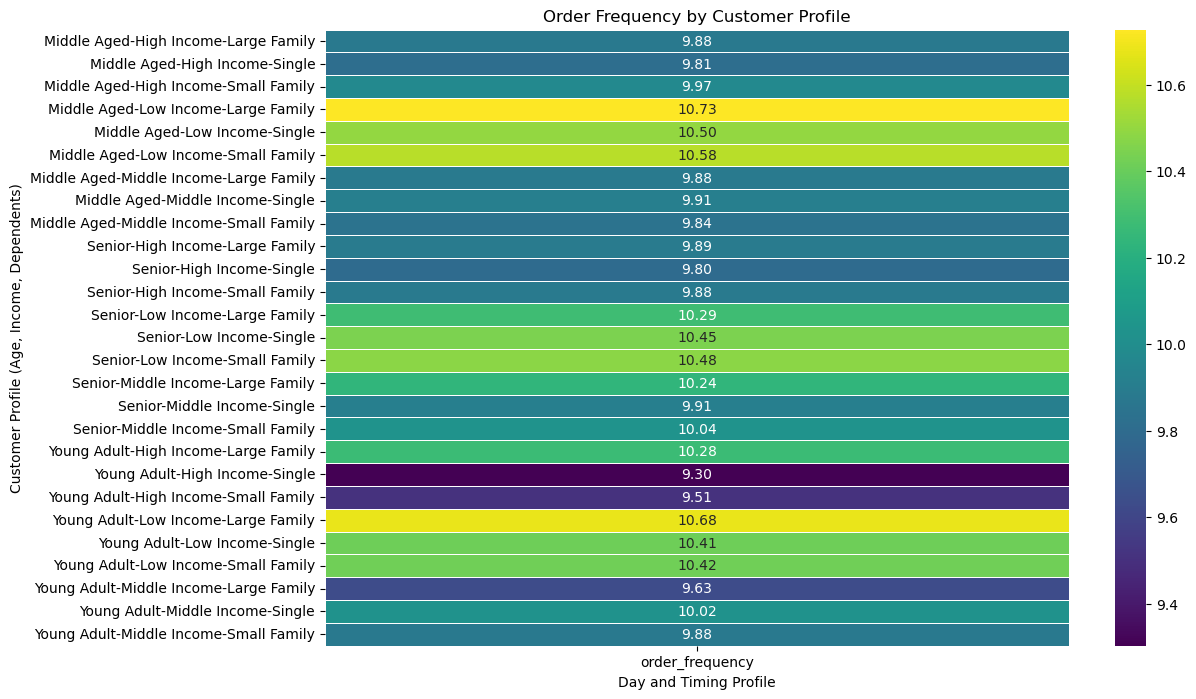

In [61]:
# Heatmap of the order frequency cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(order_freq_ct, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title('Order Frequency by Customer Profile')
plt.xlabel('Day and Timing Profile')
plt.ylabel('Customer Profile (Age, Income, Dependents)')
order_freq_ct_heatmap = plt.gcf()
plt.show()

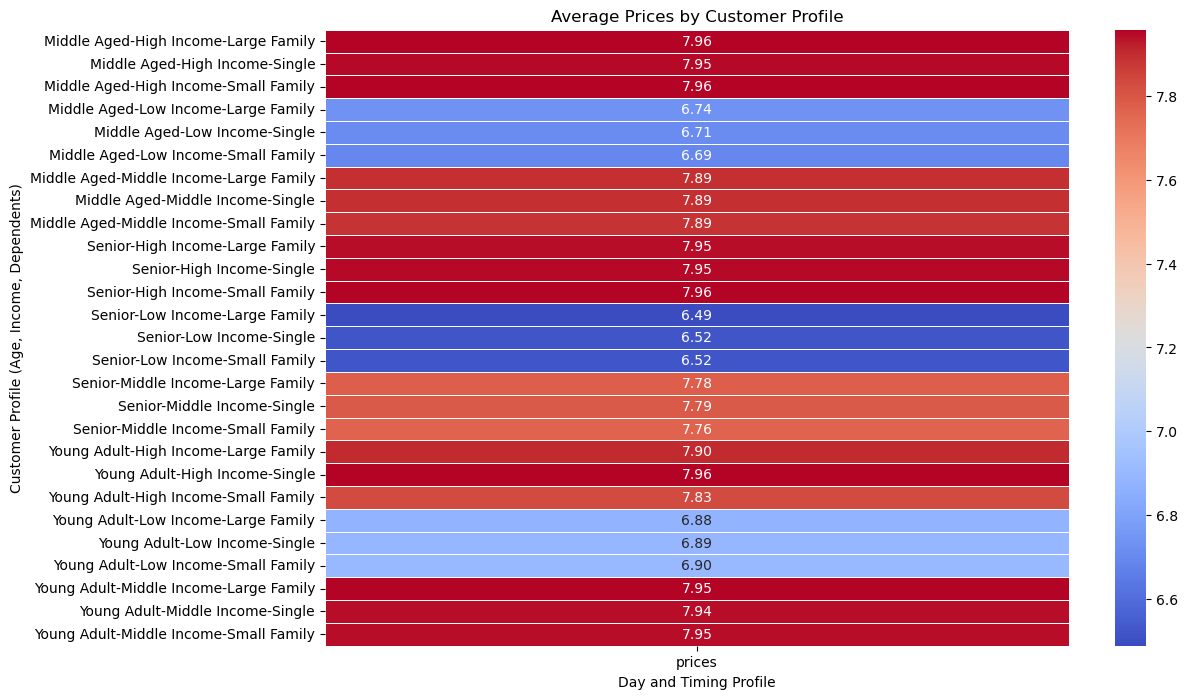

In [62]:
# Heatmap of the prices cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(prices_ct, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Average Prices by Customer Profile')
plt.xlabel('Day and Timing Profile')
plt.ylabel('Customer Profile (Age, Income, Dependents)')
prices_ct_heatmap = plt.gcf()
plt.show()

### Export all visualizations from the notebook to the project folder "Visualizations".

In [63]:
bar_spending_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region.png'))

In [64]:
bar_exclusion.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_customer_activity.png'))

In [65]:
age_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [66]:
income_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [67]:
dependents_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_profile_pie.png'))

In [68]:
department_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_profile_bar.png'))

In [69]:
departments_profile_histo.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_profile_histo.png'))

In [70]:
timing_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'timing_profile_pie.png'))

In [71]:
day_of_week_profile_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_profile_bar.png'))

In [72]:
department_regions_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_regions_bar.png'))

In [73]:
region_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_stacked_bar.png'))

In [74]:
price_range_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

In [75]:
top_selling_products_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_selling_products_bar.png'))

In [76]:
departments_order_freq_bar.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_order_freq_bar.png'))

In [77]:
order_freq_ct_heatmap.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_freq_ct_heatmap.png'))

In [78]:
prices_ct_heatmap.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_ct_heatmap.png'))

## 10. Export the Final Dataset

### Export the final dataset as a pickle

In [79]:
# Export the cleaned and processed data
df_four_ten.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_4_10_dataset.pkl'))

# End of Exercise 4.10 PART 1